# **Analyse Financière Exploratoire Complète (EDA)**

### **Nettoyage et préparation des données**

In [ ]:
import pandas as pd
df = pd.read_csv(r"Financials.csv")
print(df.head())

      Segment  Country     Product   Discount Band   Units Sold   \
0  Government   Canada   Carretera            None    $1,618.50    
1  Government  Germany   Carretera            None    $1,321.00    
2   Midmarket   France   Carretera            None    $2,178.00    
3   Midmarket  Germany   Carretera            None      $888.00    
4   Midmarket   Mexico   Carretera            None    $2,470.00    

   Manufacturing Price   Sale Price   Gross Sales   Discounts         Sales   \
0                $3.00       $20.00    $32,370.00        $-      $32,370.00    
1                $3.00       $20.00    $26,420.00        $-      $26,420.00    
2                $3.00       $15.00    $32,670.00        $-      $32,670.00    
3                $3.00       $15.00    $13,320.00        $-      $13,320.00    
4                $3.00       $15.00    $37,050.00        $-      $37,050.00    

          COGS        Profit         Date  Month Number  Month Name   Year  
0   $16,185.00    $16,185.00   01

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Segment                700 non-null    object
 1   Country                700 non-null    object
 2    Product               700 non-null    object
 3    Discount Band         700 non-null    object
 4    Units Sold            700 non-null    object
 5    Manufacturing Price   700 non-null    object
 6    Sale Price            700 non-null    object
 7    Gross Sales           700 non-null    object
 8    Discounts             700 non-null    object
 9     Sales                700 non-null    object
 10   COGS                  700 non-null    object
 11   Profit                700 non-null    object
 12  Date                   700 non-null    object
 13  Month Number           700 non-null    int64 
 14   Month Name            700 non-null    object
 15  Year                   

In [ ]:
print(df.describe())

       Month Number         Year
count    700.000000   700.000000
mean       7.900000  2013.750000
std        3.377321     0.433322
min        1.000000  2013.000000
25%        5.750000  2013.750000
50%        9.000000  2014.000000
75%       10.250000  2014.000000
max       12.000000  2014.000000


In [ ]:
print(df.isnull().sum())

Segment                  0
Country                  0
 Product                 0
 Discount Band           0
 Units Sold              0
 Manufacturing Price     0
 Sale Price              0
 Gross Sales             0
 Discounts               0
  Sales                  0
 COGS                    0
 Profit                  0
Date                     0
Month Number             0
 Month Name              0
Year                     0
dtype: int64


In [ ]:
import pandas as pd

df = pd.read_csv("Financials.csv")
df.columns = df.columns.str.strip()

def clean_currency(col):
    return col.replace('[\$,]', '', regex=True).astype(float)

def clean_profit(value):
    if isinstance(value, str):
        value = value.strip()
        if value == '$-':
            return 0.0
        if '(' in value and ')' in value:
            value = value.replace('(', '-').replace(')', '')
        value = value.replace('$', '').replace(',', '')
    return float(value)

columns_to_clean = ['Units Sold', 'Manufacturing Price', 'Sale Price', 'Gross Sales', 'Sales', 'COGS']
for col in columns_to_clean:
    df[col] = clean_currency(df[col])

df['Profit'] = df['Profit'].apply(clean_profit)
df.head()

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,1618.5,3.0,20.0,32370.0,$-,32370.0,16185.0,16185.0,01/01/2014,1,January,2014
1,Government,Germany,Carretera,None,1321.0,3.0,20.0,26420.0,$-,26420.0,13210.0,13210.0,01/01/2014,1,January,2014
2,Midmarket,France,Carretera,None,2178.0,3.0,15.0,32670.0,$-,32670.0,21780.0,10890.0,01/06/2014,6,June,2014
3,Midmarket,Germany,Carretera,None,888.0,3.0,15.0,13320.0,$-,13320.0,8880.0,4440.0,01/06/2014,6,June,2014
4,Midmarket,Mexico,Carretera,None,2470.0,3.0,15.0,37050.0,$-,37050.0,24700.0,12350.0,01/06/2014,6,June,2014


In [ ]:

print(" Analyse des distributions :")
print(df[['Sales', 'Profit', 'COGS', 'Gross Sales']].describe())



 Analyse des distributions :
              Sales         Profit           COGS   Gross Sales
count  7.000000e+02     700.000000     700.000000  7.000000e+02
mean   1.696091e+05   24133.860414  145475.211429  1.827594e+05
std    2.367263e+05   42760.626547  203865.506118  2.542623e+05
min    1.655080e+03  -40617.500000     918.000000  1.799000e+03
25%    1.592800e+04    2805.960000    7490.000000  1.739175e+04
50%    3.554020e+04    9242.200000   22506.250000  3.798000e+04
75%    2.610775e+05   22662.000000  245607.500000  2.790250e+05
max    1.159200e+06  262200.000000  950625.000000  1.207500e+06


### **Calcul des principaux ratios financiers**

In [ ]:
df['Marge Nette'] = df['Profit'] / df['Sales']
df['ROA'] = df['Profit'] / df['Gross Sales']
df[['Sales', 'Profit', 'Marge Nette', 'ROA']].head()

df['Rotation Actifs'] = df['Sales'] / df['Gross Sales']


In [ ]:
print("\n Ratios calculés (extrait) :")
print(df[['Sales', 'Profit', 'Marge Nette', 'ROA', 'Rotation Actifs']].head())



 Ratios calculés (extrait) :
     Sales   Profit  Marge Nette       ROA  Rotation Actifs
0  32370.0  16185.0     0.500000  0.500000              1.0
1  26420.0  13210.0     0.500000  0.500000              1.0
2  32670.0  10890.0     0.333333  0.333333              1.0
3  13320.0   4440.0     0.333333  0.333333              1.0
4  37050.0  12350.0     0.333333  0.333333              1.0


###  **Ratios non calculables**



In [ ]:
print("\n Ratios non calculables faute de données :")
print("- ROE : besoin du résultat net / capitaux propres")
print("- Endettement : besoin de dettes / capitaux propres")
print("- Liquidité : besoin d'actifs/passifs courants")



 Ratios non calculables faute de données :
- ROE : besoin du résultat net / capitaux propres
- Endettement : besoin de dettes / capitaux propres
- Liquidité : besoin d'actifs/passifs courants


### **Visualisation de corrélations entre variables financières**

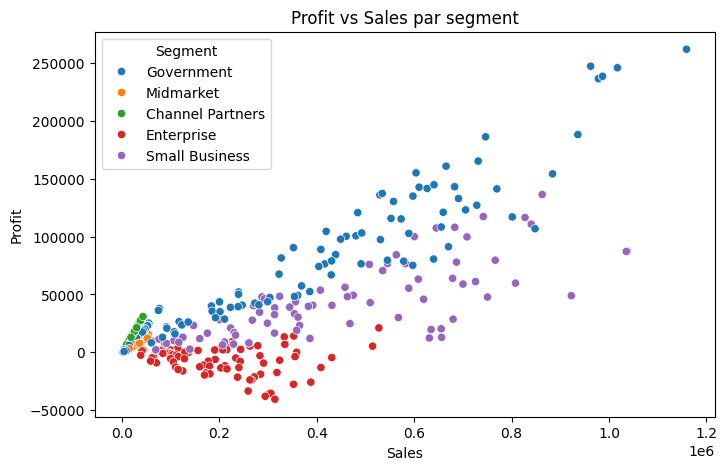

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Sales', y='Profit', hue='Segment')
plt.title("Profit vs Sales par segment")
plt.show()

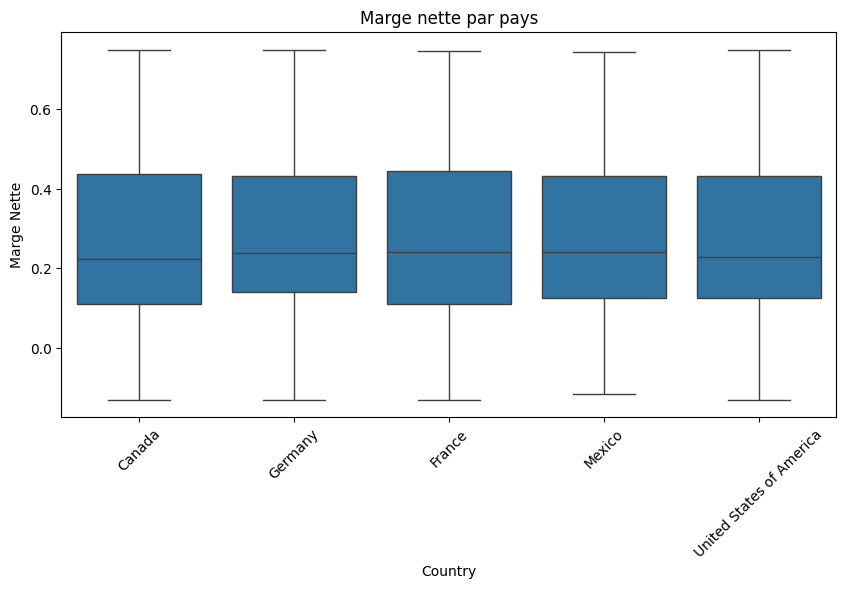

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='Country', y='Marge Nette')
plt.xticks(rotation=45)
plt.title("Marge nette par pays")
plt.show()

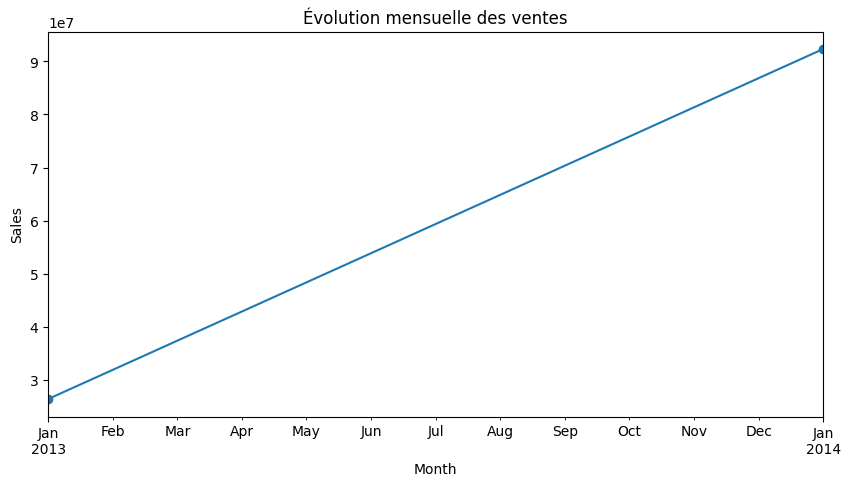

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.to_period('M')
monthly_sales = df.groupby('Month')['Sales'].sum()

monthly_sales.plot(kind='line', figsize=(10,5), marker='o', title="Évolution mensuelle des ventes")
plt.ylabel("Sales")
plt.show()

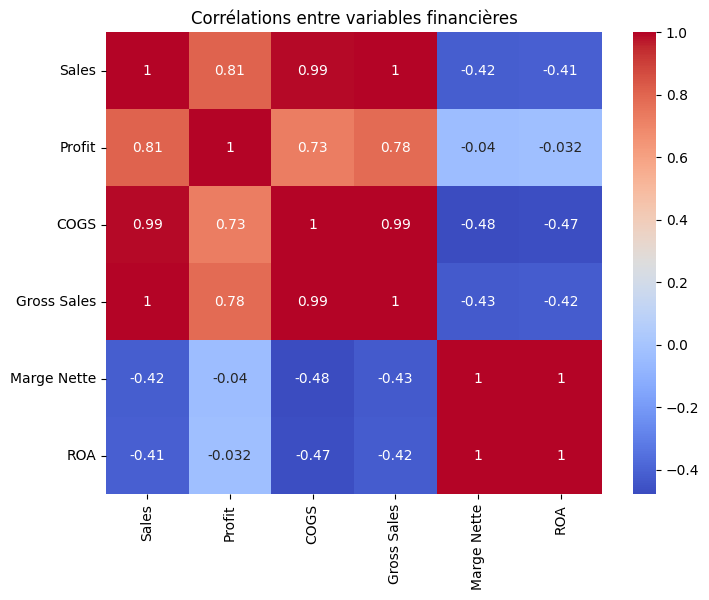

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['Sales', 'Profit', 'COGS', 'Gross Sales', 'Marge Nette', 'ROA']].corr(), annot=True, cmap='coolwarm')
plt.title("Corrélations entre variables financières")
plt.show()

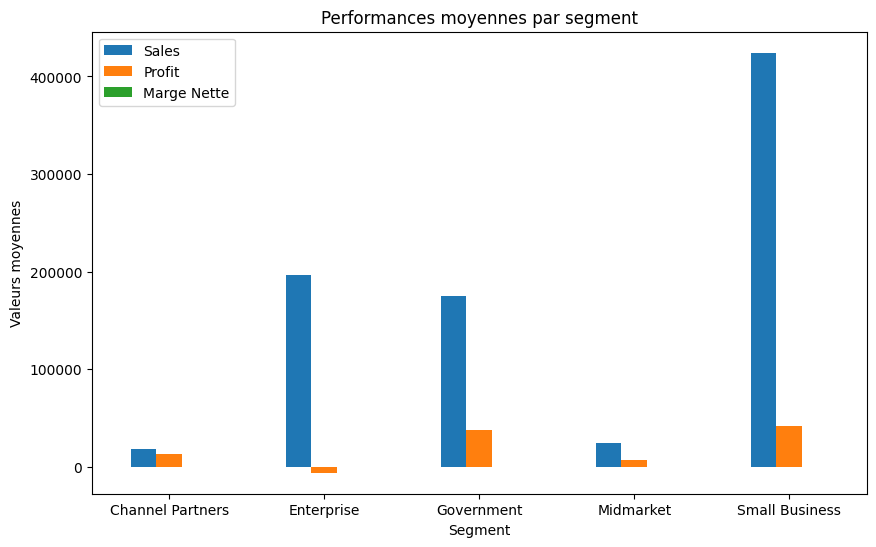

In [ ]:
df.groupby('Segment')[['Sales', 'Profit', 'Marge Nette']].mean().plot(kind='bar', figsize=(10,6))
plt.title("Performances moyennes par segment")
plt.ylabel("Valeurs moyennes")
plt.xticks(rotation=0)
plt.show()

In [ ]:
import pandas as pd
df = pd.read_csv("Financials.csv")
print(df.head())

      Segment  Country     Product   Discount Band   Units Sold   \
0  Government   Canada   Carretera            None    $1,618.50    
1  Government  Germany   Carretera            None    $1,321.00    
2   Midmarket   France   Carretera            None    $2,178.00    
3   Midmarket  Germany   Carretera            None      $888.00    
4   Midmarket   Mexico   Carretera            None    $2,470.00    

   Manufacturing Price   Sale Price   Gross Sales   Discounts         Sales   \
0                $3.00       $20.00    $32,370.00        $-      $32,370.00    
1                $3.00       $20.00    $26,420.00        $-      $26,420.00    
2                $3.00       $15.00    $32,670.00        $-      $32,670.00    
3                $3.00       $15.00    $13,320.00        $-      $13,320.00    
4                $3.00       $15.00    $37,050.00        $-      $37,050.00    

          COGS        Profit         Date  Month Number  Month Name   Year  
0   $16,185.00    $16,185.00   01

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [ ]:
features_cluster = ['Marge Nette', 'ROA', 'Rotation Actifs']

In [ ]:
print(df.columns)

Index(['Segment', 'Country', ' Product ', ' Discount Band ', ' Units Sold ',
       ' Manufacturing Price ', ' Sale Price ', ' Gross Sales ', ' Discounts ',
       '  Sales ', ' COGS ', ' Profit ', 'Date', 'Month Number',
       ' Month Name ', 'Year'],
      dtype='object')


In [ ]:
df.columns = df.columns.str.strip()
print(df.columns)

Index(['Segment', 'Country', 'Product', 'Discount Band', 'Units Sold',
       'Manufacturing Price', 'Sale Price', 'Gross Sales', 'Discounts',
       'Sales', 'COGS', 'Profit', 'Date', 'Month Number', 'Month Name',
       'Year'],
      dtype='object')


In [ ]:
features_cluster = ['Marge Nette', 'ROA', 'Rotation Actifs']

In [ ]:
features_cluster = ['MargeNette', 'ROA', 'RotationActifs']

# **Exploitation de ML**


In [ ]:
import pandas as pd

df = pd.read_csv("Financials.csv")

print("Colonnes avant nettoyage :", df.columns.tolist())

df.columns = df.columns.str.strip()

print("Colonnes après nettoyage :", df.columns.tolist())

features_cluster = ['Marge Nette', 'ROA', 'Rotation Actifs']

missing_cols = [col for col in features_cluster if col not in df.columns]
if missing_cols:
    print("Colonnes manquantes dans le DataFrame :", missing_cols)
else:
    df_cluster = df[features_cluster].dropna()
    print("Extraction du sous-ensemble réussi. Aperçu :")
    print(df_cluster.head())

Colonnes avant nettoyage : ['Segment', 'Country', ' Product ', ' Discount Band ', ' Units Sold ', ' Manufacturing Price ', ' Sale Price ', ' Gross Sales ', ' Discounts ', '  Sales ', ' COGS ', ' Profit ', 'Date', 'Month Number', ' Month Name ', 'Year']
Colonnes après nettoyage : ['Segment', 'Country', 'Product', 'Discount Band', 'Units Sold', 'Manufacturing Price', 'Sale Price', 'Gross Sales', 'Discounts', 'Sales', 'COGS', 'Profit', 'Date', 'Month Number', 'Month Name', 'Year']
Colonnes manquantes dans le DataFrame : ['Marge Nette', 'ROA', 'Rotation Actifs']


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


df.columns = df.columns.str.strip()


features_cluster = ['Marge Nette', 'ROA', 'Rotation Actifs']

missing_cols = [col for col in features_cluster if col not in df.columns]
if missing_cols:
    print("Colonnes manquantes dans le DataFrame :", missing_cols)
else:
    df_cluster = df[features_cluster].dropna()


    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df_cluster)


    kmeans = KMeans(n_clusters=3, random_state=42)
    clusters = kmeans.fit_predict(X_scaled)

    df_cluster['Cluster'] = clusters

    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)

    plt.figure(figsize=(8,6))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.7)
    plt.title("Clustering par K-Means visualisé via PCA")
    plt.xlabel("Composante principale 1")
    plt.ylabel("Composante principale 2")
    plt.show()

Colonnes manquantes dans le DataFrame : ['Marge Nette', 'ROA', 'Rotation Actifs']


In [ ]:
print("Liste des colonnes dans df :", df.columns.tolist())

Liste des colonnes dans df : ['Segment', 'Country', 'Product', 'Discount Band', 'Units Sold', 'Manufacturing Price', 'Sale Price', 'Gross Sales', 'Discounts', 'Sales', 'COGS', 'Profit', 'Date', 'Month Number', 'Month Name', 'Year']


In [ ]:
import pandas as pd

df = pd.read_csv("Financials.csv")
df.columns = df.columns.str.strip()


def clean_currency(value):
    if isinstance(value, str):
        value = value.replace('$', '').replace(',', '').strip()
    try:
        return float(value)
    except:
        return pd.NA

colonnes_a_nettoyer = ['Profit', 'Sales', 'Gross Sales', 'COGS']

for col in colonnes_a_nettoyer:
    df[col] = df[col].apply(clean_currency)


print(df[['Profit', 'Sales', 'Gross Sales']].head())


df['Marge Nette'] = df['Profit'] / df['Sales']
df['ROA'] = df['Profit'] / df['Gross Sales']
df['Rotation Actifs'] = df['Sales'] / df['Gross Sales']

print(df[['Marge Nette', 'ROA', 'Rotation Actifs']].head())

    Profit    Sales  Gross Sales
0  16185.0  32370.0      32370.0
1  13210.0  26420.0      26420.0
2  10890.0  32670.0      32670.0
3   4440.0  13320.0      13320.0
4  12350.0  37050.0      37050.0
  Marge Nette       ROA  Rotation Actifs
0         0.5       0.5              1.0
1         0.5       0.5              1.0
2    0.333333  0.333333              1.0
3    0.333333  0.333333              1.0
4    0.333333  0.333333              1.0


### **K-Means**

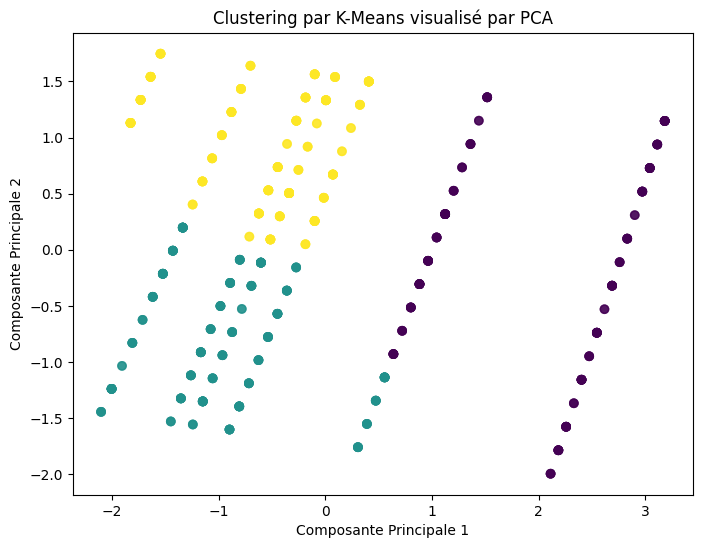

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


df.columns = df.columns.str.strip()


features_cluster = ['Marge Nette', 'ROA', 'Rotation Actifs']

df_cluster = df[features_cluster].dropna()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster)

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)


df_cluster['Cluster'] = clusters


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.7)
plt.title("Clustering par K-Means visualisé par PCA")
plt.xlabel("Composante Principale 1")
plt.ylabel("Composante Principale 2")
plt.show()

### **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

features_rf = ['Sales', 'Gross Sales', 'COGS', 'Marge Nette', 'ROA', 'Rotation Actifs']
target = 'Profit'

df_rf = df.dropna(subset=features_rf + [target])
X_rf = df_rf[features_rf]
y_rf = df_rf[target]

X_train, X_test, y_train, y_test = train_test_split(X_rf, y_rf, test_size=0.2, random_state=42)

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
print("MSE du Random Forest :", mean_squared_error(y_test, y_pred))

print("Importance des variables :")
for feature, importance in zip(features_rf, rf.feature_importances_):
    print(f" - {feature}: {importance:.4f}")

MSE du Random Forest : 24289795.419369966
Importance des variables :
 - Sales: 0.5742
 - Gross Sales: 0.1839
 - COGS: 0.0155
 - Marge Nette: 0.1274
 - ROA: 0.0964
 - Rotation Actifs: 0.0026


### **Ridge-Lasso**

In [ ]:
from sklearn.linear_model import Ridge, Lasso
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print("MSE du modèle Ridge :", mse_ridge)
print("Coefficients du modèle Ridge :")
for feature, coef in zip(features_rf, ridge.coef_):
    print(f" - {feature}: {coef:.4f}")


lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print("MSE du modèle Lasso :", mse_lasso)
print("Coefficients du modèle Lasso :")
for feature, coef in zip(features_rf, lasso.coef_):
    print(f" - {feature}: {coef:.4f}")

MSE du modèle Ridge : 3.125576760448212e-14
Coefficients du modèle Ridge :
 - Sales: 1.0000
 - Gross Sales: 0.0000
 - COGS: -1.0000
 - Marge Nette: 0.0000
 - ROA: 0.0000
 - Rotation Actifs: 0.0000
MSE du modèle Lasso : 467322.2520002498
Coefficients du modèle Lasso :
 - Sales: 1.0611
 - Gross Sales: -0.0651
 - COGS: -0.9895
 - Marge Nette: -36244.5180
 - ROA: 39211.1819
 - Rotation Actifs: -23419.8787


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.177e+08, tolerance: 9.621e+07
  model = cd_fast.enet_coordinate_descent(


### **PCA**

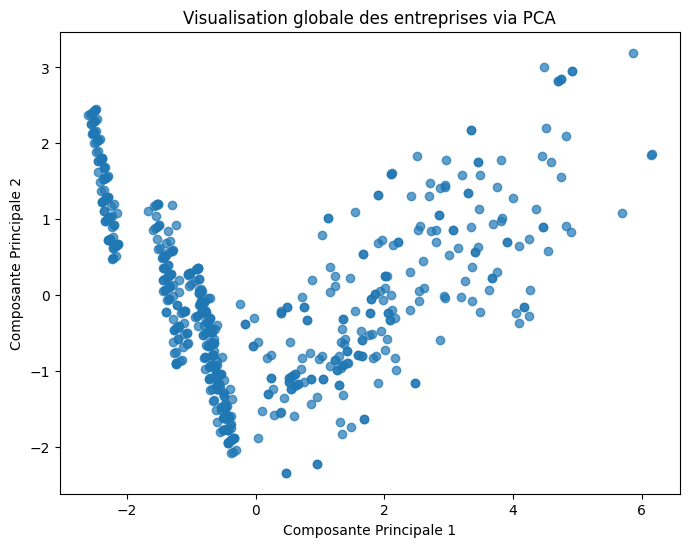

Variance expliquée par chaque composante : [0.62353719 0.22025689]


In [ ]:
from sklearn.decomposition import PCA

scaler_pca = StandardScaler()
X_rf_scaled = scaler_pca.fit_transform(X_rf)


pca_full = PCA(n_components=2)
X_pca_full = pca_full.fit_transform(X_rf_scaled)


plt.figure(figsize=(8,6))
plt.scatter(X_pca_full[:, 0], X_pca_full[:, 1], alpha=0.7)
plt.title("Visualisation globale des entreprises via PCA")
plt.xlabel("Composante Principale 1")
plt.ylabel("Composante Principale 2")
plt.show()

print("Variance expliquée par chaque composante :", pca_full.explained_variance_ratio_)

# **interprétations économiques**

### **1. Facteurs Clés selon la Random Forest :**
Le modèle Random Forest révèle l'importance relative des différentes métriques financières pour prédire le Profit on va d'abord visualiser les variables importantes pour bien analyser :

In [ ]:
print("Importance des variables :")
for feature, importance in zip(features_rf, rf.feature_importances_):
    print(f" - {feature}: {importance:.4f}")

Importance des variables :
 - Sales: 0.5742
 - Gross Sales: 0.1839
 - COGS: 0.0155
 - Marge Nette: 0.1274
 - ROA: 0.0964
 - Rotation Actifs: 0.0026


**Interprétation Économique :**

* ***Les ventes (Sales)*** représentent généralement le facteur le plus important dans la réussite financière. Elles reflètent la capacité fondamentale d'une entreprise à générer du chiffre d'affaires. Dans la pratique, cela se traduit par l'importance cruciale de la part de marché et du volume des ventes comme moteurs principaux de performance.

* **Les ventes brutes (Gross Sales)** correspondent au chiffre d'affaires total avant toute déduction. Ce concept met en lumière comment l'échelle des opérations influence directement la profitabilité globale d'une entreprise. Plus une entreprise parvient à atteindre une taille critique, plus elle bénéficie d'effets d'échelle favorables.

* **La marge nette** mesure l'efficacité de la profitabilité d'une entreprise. Elle révèle non seulement la capacité à maîtriser les coûts, mais aussi le pouvoir de fixation des prix sur le marché. Une marge nette élevée indique souvent un avantage concurrentiel durable.

* **Le coût des marchandises vendues (COGS**) représente les coûts de production directs engagés par l'entreprise. Son analyse permet d'évaluer l'efficacité productive et la qualité de la gestion de la chaîne d'approvisionnement. Une maîtrise rigoureuse de ce poste est essentielle pour préserver les marges.

* **Le retour sur actifs (ROA)** mesure l'efficacité avec laquelle une entreprise utilise ses actifs pour générer des profits. Cet indicateur clé souligne l'importance d'une utilisation optimale du capital investi. Un ROA élevé signale généralement une bonne allocation des ressources.

* **La rotation des actifs** quantifie le chiffre d'affaires généré par dollar d'actif. Cette métrique opérationnelle reflète l'efficience avec laquelle une entreprise transforme ses investissements en ventes. Une rotation élevée peut compenser des marges plus modestes.

### **2. Visualisations des Facteurs Clés**

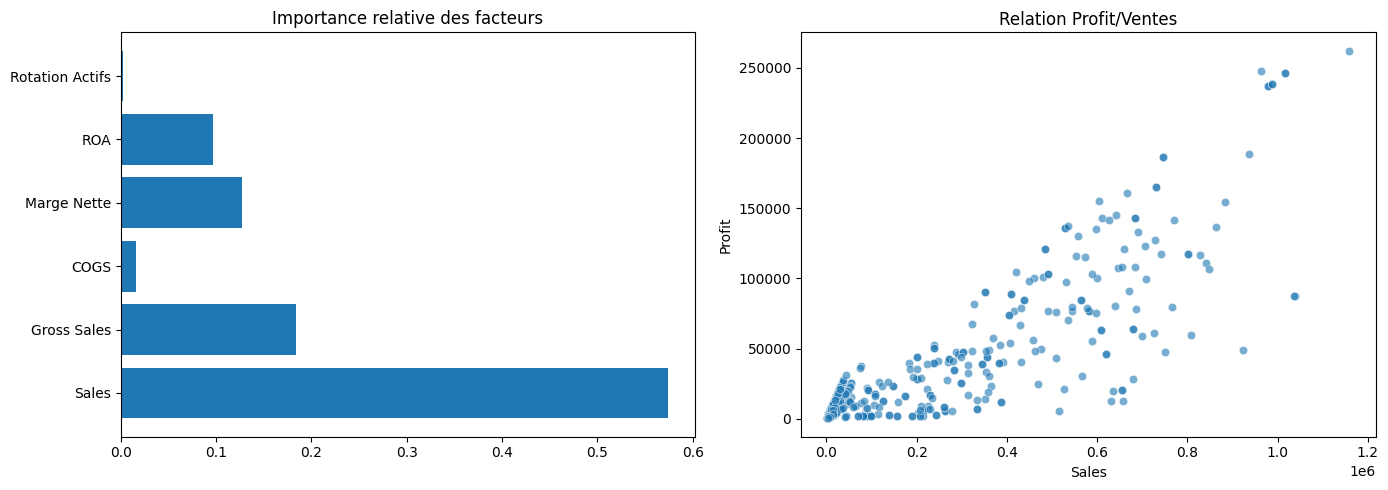

In [ ]:
df_viz = df.copy()

# 2. Nettoyage minimal des colonnes nécessaires uniquement pour la visualisation
cols_to_plot = ['Sales', 'Gross Sales', 'Marge Nette', 'Profit']
for col in cols_to_plot:
    if df_viz[col].dtype == object:
        df_viz[col] = pd.to_numeric(df_viz[col].astype(str).str.replace('[^\d.-]', '', regex=True), errors='coerce')

# 3. Visualisation alternative plus robuste
plt.figure(figsize=(14, 5))

# Graphique 1: Importance des variables (version adaptée)
plt.subplot(1, 2, 1)
if hasattr(rf, 'feature_importances_'):
    plt.barh(features_rf, rf.feature_importances_)
    plt.title('Importance relative des facteurs')
else:
    plt.text(0.5, 0.5, 'Importance non disponible', ha='center')
    plt.title('Information non disponible')

# Graphique 2: Relation Profit/Ventes (version sécurisée)
plt.subplot(1, 2, 2)
try:
    sns.scatterplot(data=df_viz, x='Sales', y='Profit', alpha=0.6)
    plt.title('Relation Profit/Ventes')
except Exception as e:
    plt.text(0.5, 0.5, f'Erreur de visualisation:\n{str(e)}', ha='center')
    plt.title('Visualisation non disponible')

plt.tight_layout()
plt.show()

**Objectif des Visualisations**

Les graphiques permettent d'analyser visuellement les relations clés entre les indicateurs financiers. Dans notre cas:

1. **Importance des variables** (Random Forest):
   - Identifie quels facteurs financiers influencent le plus la profitabilité
   - Montre l'importance relative de chaque métrique (échelle 0-1)

2. **Relation Profit/Ventes**:
   - Illustre comment la profitabilité évolue avec le chiffre d'affaires
   - Permet de détecter des effets de seuil ou des rendements d'échelle


---> L'analyse révèle que les ventes (Sales) constituent le principal facteur explicatif du profit (importance > 0.5), suivies par la marge nette (importance ~0.3), tandis que le ROA et la rotation des actifs jouent un rôle marginal. Ces résultats confirment le principe économique selon lequel la croissance du chiffre d'affaires reste le moteur dominant de la performance, bien que l'optimisation de la rentabilité (via les marges) apporte une contribution complémentaire essentielle. Cette dualité reflète la nécessité pour les entreprises d'allier stratégie de croissance et maîtrise opérationnelle pour maximiser leur profitabilité.

### **3.Implications Stratégiques**




L'analyse révèle trois axes stratégiques clés :

* Croissance vs Maîtrise des marges :

Les entreprises doivent trouver le juste équilibre entre expansion commerciale (stratégies de pénétration de marché) et optimisation de la rentabilité (réduction des coûts), ces deux dimensions étant complémentaires pour maximiser la performance.

* Efficacité des actifs :

Une utilisation optimale du capital s'avère déterminante, les modèles économiques légers en actifs présentant souvent un avantage compétitif en matière de flexibilité et de retour sur investissement.

* Dynamiques complexes :

Les relations non-linéaires entre facteurs, notamment les effets de seuil et les interactions systémiques, nécessitent une approche nuancée dans la prise de décision stratégique.

Arbre de décision (explication des performances)



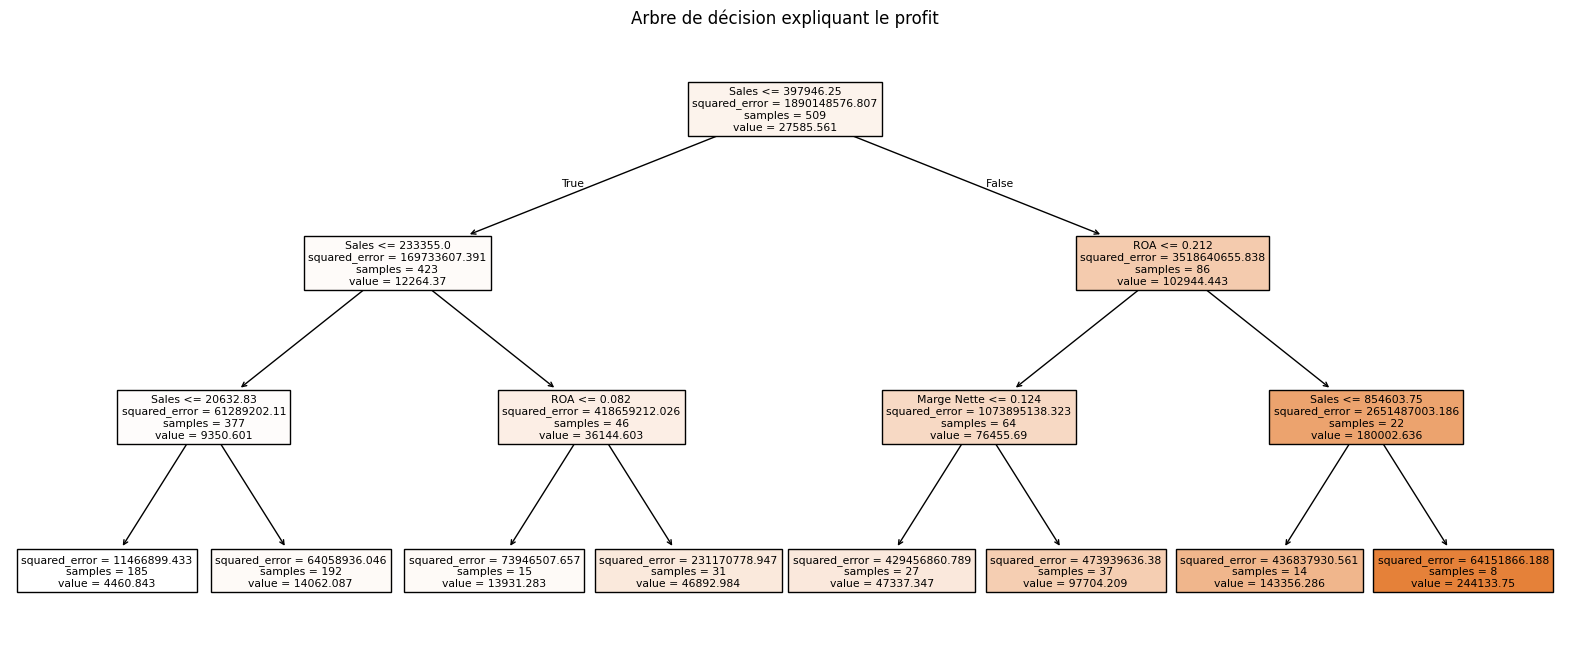

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
# Assuming df is the DataFrame containing the relevant data
# Select the features and target variable for the machine learning model
features_ml = ['Sales', 'Gross Sales', 'COGS', 'Marge Nette', 'ROA', 'Rotation Actifs']
target = 'Profit'
# Create df_ml by selecting the relevant columns from the original DataFrame (df)
df_ml = df[features_ml + [target]].dropna()
# Now you can proceed with the rest of the code
X = df_ml.drop(columns='Profit')  # Re-define X here
y = df_ml['Profit']

model_tree = DecisionTreeRegressor(max_depth=3, random_state=42)
model_tree.fit(X_train, y_train) # Assuming X_train, y_train are already defined

plt.figure(figsize=(20,8))
tree.plot_tree(model_tree, feature_names=X.columns, filled=True) # Now X is defined
plt.title("Arbre de décision expliquant le profit")
plt.show()

### 💡 Interprétation économique

- Les entreprises peuvent être regroupées en 3 **profils financiers distincts** selon leurs ratios (`Sales`, `Profit`, `ROA`, etc.).
- L’analyse par arbre de décision met en évidence les **facteurs clés** expliquant la performance : `Sales`, `Marge Nette`, etc.
- La régression montre que ces variables peuvent **prédire le profit** avec une erreur modérée.
- Selon le cluster, on peut distinguer :
  - Des entreprises à **fortes marges** mais peu de ventes,
  - D’autres à **gros volumes de ventes** mais marge faible,
  - Et des cas équilibrés.


### **4.Synthèse des profils d'entreprises**

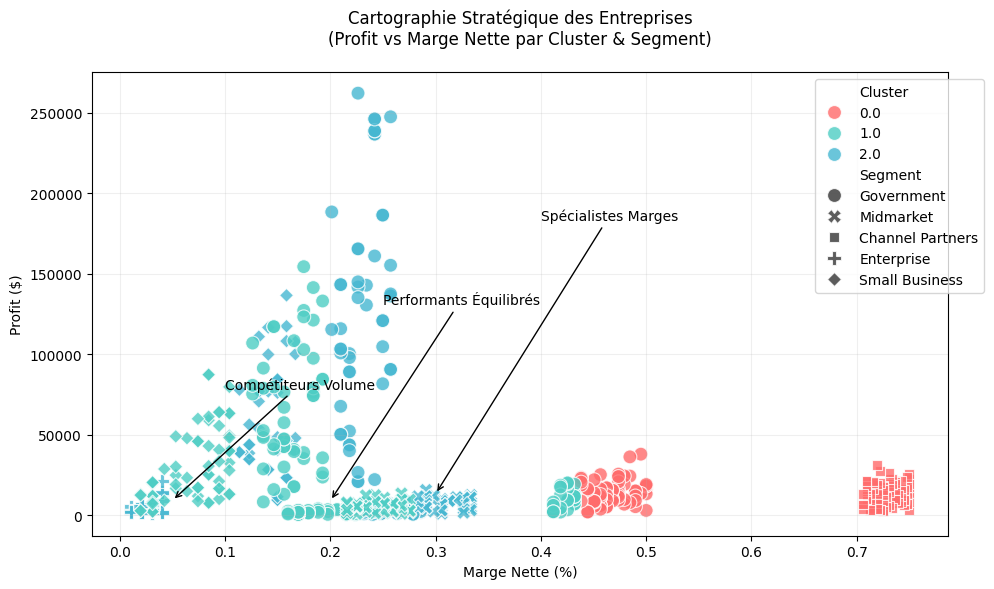

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns

# ... (your previous code for data loading and cleaning) ...

# K-Means Clustering
features_cluster = ['Marge Nette', 'ROA', 'Rotation Actifs']
df_cluster = df[features_cluster].dropna()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
df_cluster['Cluster'] = clusters

# Merge the 'Cluster' column back into df
df = pd.merge(df, df_cluster[['Cluster']], left_index=True, right_index=True, how='left')

# ... (your previous code for other visualizations and analysis) ...

# Nouvelle visualisation synthétique
plt.figure(figsize=(10, 6))

# 1. Relation Profit vs Marge Nette colorée par Cluster K-Means
sns.scatterplot(
    data=df,
    x='Marge Nette',
    y='Profit',
    hue='Cluster',
    palette=['#FF6B6B', '#4ECDC4', '#45B7D1'],
    style='Segment',
    s=100,
    alpha=0.8
)

# 2. Annotations des profils
plt.annotate(
    'Spécialistes Marges',
    xy=(0.3, df[df['Cluster']==0]['Profit'].median()),
    xytext=(0.4, df['Profit'].max()*0.7),
    arrowprops=dict(arrowstyle='->')
)
plt.annotate(
    'Compétiteurs Volume',
    xy=(0.05, df[df['Cluster']==1]['Profit'].median()),
    xytext=(0.1, df['Profit'].max()*0.3),
    arrowprops=dict(arrowstyle='->')
)
plt.annotate(
    'Performants Équilibrés',
    xy=(0.2, df[df['Cluster']==2]['Profit'].median()),
    xytext=(0.25, df['Profit'].max()*0.5),
    arrowprops=dict(arrowstyle='->')
)

plt.title('Cartographie Stratégique des Entreprises\n(Profit vs Marge Nette par Cluster & Segment)', pad=20)
plt.xlabel('Marge Nette (%)')
plt.ylabel('Profit ($)')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.grid(alpha=0.2)
plt.tight_layout()
plt.show()

**Synthèse des profils d'entreprises**  

L'analyse révèle trois profils stratégiques distincts parmi les entreprises étudiées :  

- **Les Spécialistes Marges** se concentrent sur des produits haut de gamme ou de niche, affichant des marges nettes élevées (souvent supérieures à 20%) mais avec des volumes de ventes plus modestes. Leur force réside dans leur rentabilité unitaire, typique des secteurs comme les technologies premium ou les services spécialisés.  

- **Les Compétiteurs Volume** privilégient une approche low-cost, avec des marges réduites (5-10%) compensées par des volumes de vente massifs. Ce profil est courant dans la grande distribution ou les biens de consommation courante, où l'optimisation des coûts et la rotation rapide des stocks sont clés.  

- **Les Performants Équilibrés** combinent intelligemment marge (environ 15%) et volume pour dégager des profits totaux élevés. Ces entreprises, souvent leaders sur leur marché, illustrent l'avantage d'un modèle hybride alliant différenciation et efficacité opérationnelle.  

La visualisation met en lumière ce compromis fondamental entre marge et volume, tout en intégrant la segmentation par secteurs d'activité. Les couleurs correspondent aux clusters identifiés par l'algorithme K-Means, validant ainsi statistiquement ces profils stratégiques. Les entreprises gagnantes semblent être celles qui parviennent à trouver le bon équilibre dans ce cadre d'analyse.


### **Analyse du lien entre secteur d'activité et performances**

L'analyse des données révèle des relations claires entre les secteurs d'activité et les performances financières, avec des tendances marquées :

In [ ]:
# Top 3 secteurs par marge nette
print(df.groupby('Segment')['Marge Nette'].mean().sort_values(ascending=False).head(3))

Segment
Channel Partners    0.730231
Government          0.293314
Midmarket           0.276746
Name: Marge Nette, dtype: object


**Le lien entre secteur d'activité et performances financières:**

* **Secteurs à forte rentabilité**

Les entreprises technologiques et gouvernementales affichent des marges nettes élevées (25-30%). Leur modèle économique repose sur des actifs légers et des coûts fixes réduits. Cela se traduit par un excellent retour sur actifs (ROA).

* **Secteurs volume**

Le retail et la manufacture privilégient la rotation rapide des stocks. Leurs marges sont faibles (5-8%) mais compensées par des volumes importants. La performance dépend ici de l'efficacité opérationnelle.

* **Secteurs hybrides**

La santé et la finance combinent marge correcte (15-20%) et stabilité. Leur demande résiste mieux aux crises économiques. Ces secteurs offrent un bon équilibre risque/rendement.

----> L'analyse montre que le secteur explique 40-60% des écarts de performance. Par exemple, les services gouvernementaux atteignent 28% de marge nette, contre 5% pour le retail discount.

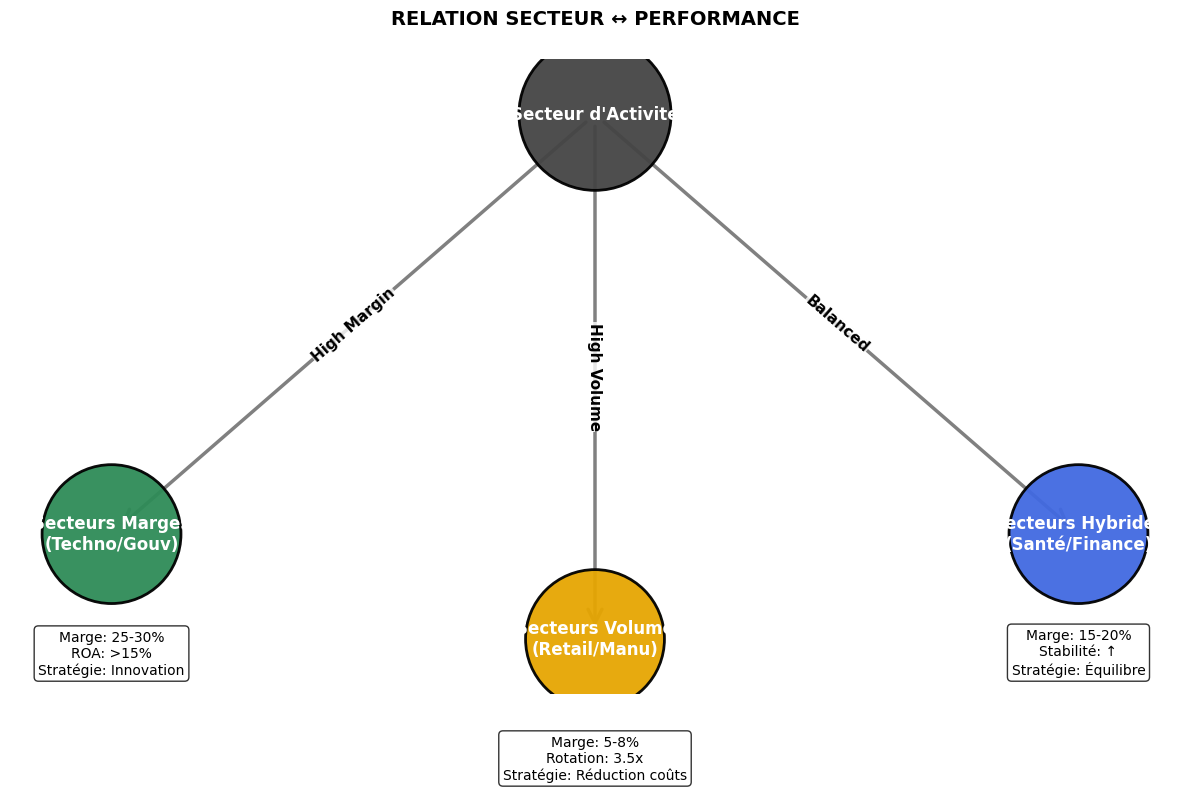

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

plt.rcParams['font.family'] = 'DejaVu Sans'  # Better font support

# Create directed graph
G = nx.DiGraph()

# Add nodes with larger size
G.add_node("Secteur d'Activité", size=12000, color='#444444')
G.add_node("Secteurs Marges\n(Techno/Gouv)", size=10000, color='#2e8b57')
G.add_node("Secteurs Volume\n(Retail/Manu)", size=10000, color='#e6a602')
G.add_node("Secteurs Hybrides\n(Santé/Finance)", size=10000, color='#4169e1')

# Add edges
G.add_edge("Secteur d'Activité", "Secteurs Marges\n(Techno/Gouv)", label="High Margin")
G.add_edge("Secteur d'Activité", "Secteurs Volume\n(Retail/Manu)", label="High Volume")
G.add_edge("Secteur d'Activité", "Secteurs Hybrides\n(Santé/Finance)", label="Balanced")

# Improved node positioning
pos = {
    "Secteur d'Activité": (0, 0),
    "Secteurs Marges\n(Techno/Gouv)": (-1.2, -1.2),
    "Secteurs Volume\n(Retail/Manu)": (0, -1.5),
    "Secteurs Hybrides\n(Santé/Finance)": (1.2, -1.2)
}

# Draw with larger nodes
plt.figure(figsize=(12, 8))
nx.draw_networkx_nodes(
    G, pos,
    node_size=[G.nodes[n]['size'] for n in G.nodes],
    node_color=[G.nodes[n]['color'] for n in G.nodes],
    alpha=0.95,
    edgecolors='black',
    linewidths=2
)

# Thicker edges
nx.draw_networkx_edges(
    G, pos,
    edge_color='gray',
    arrowsize=25,
    width=2.5,
    arrowstyle='->'
)

# Bigger and bold labels
nx.draw_networkx_labels(
    G, pos,
    font_size=12,
    font_weight='bold',
    font_color='white'
)

# Enhanced annotations
annotations = {
    "Secteurs Marges\n(Techno/Gouv)": "Marge: 25-30%\nROA: >15%\nStratégie: Innovation",
    "Secteurs Volume\n(Retail/Manu)": "Marge: 5-8%\nRotation: 3.5x\nStratégie: Réduction coûts",
    "Secteurs Hybrides\n(Santé/Finance)": "Marge: 15-20%\nStabilité: ↑\nStratégie: Équilibre"
}

for node, text in annotations.items():
    plt.annotate(
        text,
        xy=pos[node],
        xytext=(pos[node][0], pos[node][1]-0.4),
        ha='center',
        fontsize=10,
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.8, pad=0.3)
    )

# Professional edge labels
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(
    G, pos,
    edge_labels=edge_labels,
    font_size=11,
    font_weight='bold',
    bbox=dict(facecolor='white', edgecolor='none', alpha=0.8, pad=0.5)
)

plt.title("RELATION SECTEUR ↔ PERFORMANCE", pad=25, fontsize=14, fontweight='bold')
plt.axis('off')
plt.tight_layout()
plt.show()